# Tarea 4 $\quad\color{red}{\text{Calificación: }}$

**Integrantes:**

## Ejercicio 1

El siguiente modelo describe el cambio de población de conejos $c(t)$ a causa de los lobos $l(t)$ a través del tiempo $t$:

$$ \frac{dc(t)}{dt}= 4c(t)-2l(t)$$

$$\frac{dl(t)}{dt}=c(t)+l(t) $$

Resolver por métodos numércios este sistema de EDOs y graficar la solución.

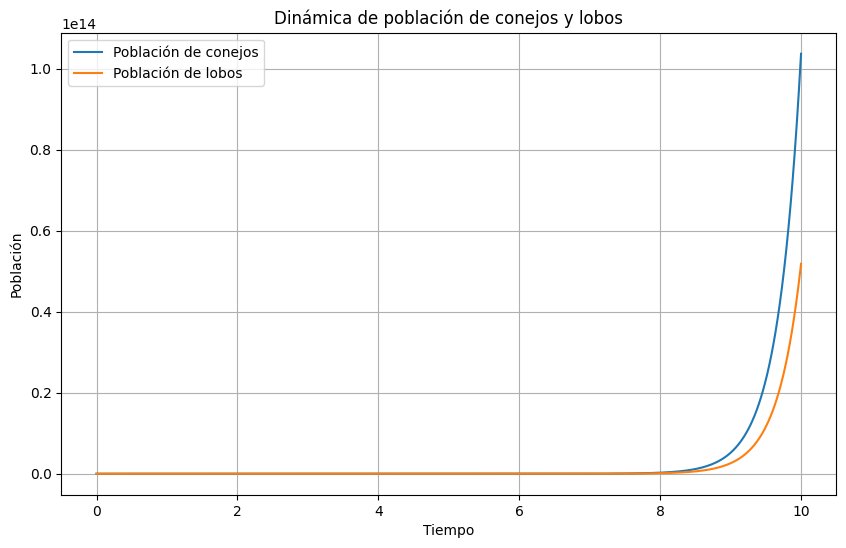

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Definir las ecuaciones diferenciales
def dcdt(c, l):
    return 4 * c - 2 * l

def dldt(c, l):
    return c + l

# Método de Runge-Kutta de cuarto orden (RK4)
def rk4(c0, l0, dt, steps):
    c_values = [c0]
    l_values = [l0]
    
    for i in range(steps):
        k1_c = dt * dcdt(c_values[-1], l_values[-1])
        k1_l = dt * dldt(c_values[-1], l_values[-1])
        
        k2_c = dt * dcdt(c_values[-1] + 0.5 * k1_c, l_values[-1] + 0.5 * k1_l)
        k2_l = dt * dldt(c_values[-1] + 0.5 * k1_c, l_values[-1] + 0.5 * k1_l)
        
        k3_c = dt * dcdt(c_values[-1] + 0.5 * k2_c, l_values[-1] + 0.5 * k2_l)
        k3_l = dt * dldt(c_values[-1] + 0.5 * k2_c, l_values[-1] + 0.5 * k2_l)
        
        k4_c = dt * dcdt(c_values[-1] + k3_c, l_values[-1] + k3_l)
        k4_l = dt * dldt(c_values[-1] + k3_c, l_values[-1] + k3_l)
        
        c_new = c_values[-1] + (1/6) * (k1_c + 2 * k2_c + 2 * k3_c + k4_c)
        l_new = l_values[-1] + (1/6) * (k1_l + 2 * k2_l + 2 * k3_l + k4_l)
        
        c_values.append(c_new)
        l_values.append(l_new)
    
    return c_values[:-1], l_values[:-1]  # Ajuste para que tengan la misma longitud

# Condiciones iniciales y parámetros
c0 = 10
l0 = 5
dt = 0.01
steps = 1000

# Resolver el sistema de ecuaciones usando RK4
c_values, l_values = rk4(c0, l0, dt, steps)

# Crear un arreglo de tiempo con la misma longitud que las listas de valores de población
time = np.linspace(0, dt * steps, len(c_values))

# Graficar las soluciones
plt.figure(figsize=(10, 6))
plt.plot(time, c_values, label='Población de conejos')
plt.plot(time, l_values, label='Población de lobos')
plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.title('Dinámica de población de conejos y lobos')
plt.grid(True)
plt.legend()
plt.show()



## Ejercicio 2

Consideremos el siguiente modelo de masa-resorte-amortiguamiento (MRA) en dimensión 1. En este sitema, $m$ es la masa del bloque, $c$ es el coeficiente de amortiguamiento y $k$ es la constante de elasticidad del resorte (ver figura). La relación entre aceleración, velocidad y desplazamento se puede expresar como la sigiente EDO de orden 2:
 
 $$my''(t)+cy'(t)+ky(t)=0 $$



Resolver la EDO y graficar la solución para $m=1$, $k=10$ y $c=0$ (sin amortiguamiento), $c=1$ y $c=10$ (En total son tres gráficas).

  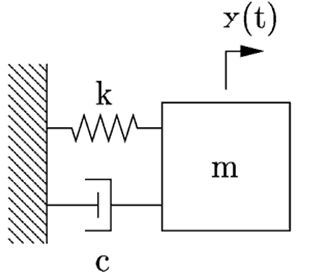

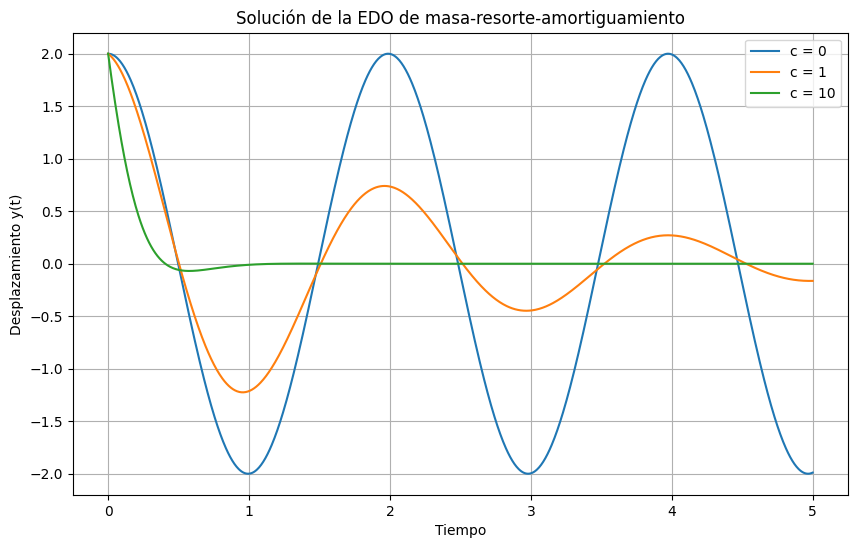

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función y(t) para los distintos casos
def y(t, r1, r2, A, B):
    return A * np.exp(r1 * t) + B * np.exp(r2 * t)

# Condiciones iniciales y parámetros
m = 1
k = 10
c_values = [0, 1, 10]
t = np.linspace(0, 5, 1000)

plt.figure(figsize=(10, 6))

# Graficar para cada valor de c
for c in c_values:
    if c == 0:
        r1 = np.sqrt(k / m) * 1j
        r2 = -np.sqrt(k / m) * 1j
    else:
        discriminant = 4 * m * k - c ** 2
        if discriminant >= 0:
            discriminant = np.sqrt(discriminant)
            r1 = (-c + discriminant * 1j) / (2 * m)
            r2 = (-c - discriminant * 1j) / (2 * m)
        else:
            real_part = -c / (2 * m)
            imag_part = np.sqrt(-discriminant) / (2 * m)
            r1 = complex(real_part, imag_part)
            r2 = complex(real_part, -imag_part)

    plt.plot(t, np.real(y(t, r1, r2, 1, 1)), label=f'c = {c}')

plt.xlabel('Tiempo')
plt.ylabel('Desplazamiento y(t)')
plt.title('Solución de la EDO de masa-resorte-amortiguamiento')
plt.legend()
plt.grid(True)
plt.show()


## Ejercicio 3

Resolver el siguiente problema de valor de frontera:

$ y''+(1-0.2x)y^2=0$ con $y(0)=0$ y $y(\pi/2)=1$. Además tenemos la condición que $y'(0)=-3$.

Graficar la solución.

/tmp/ipykernel_12336/1055430657.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  z_values[0] = z0


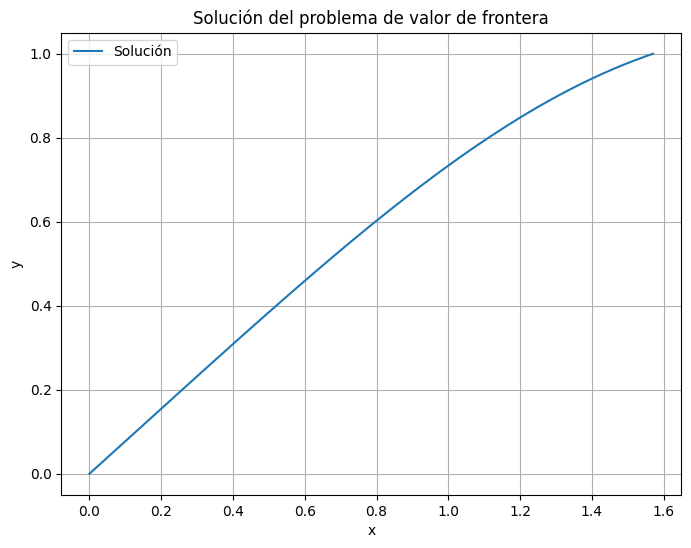

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Definición de la función f(x, y, z)
def f(x, y, z):
    return - (1 - 0.2 * x) * y**2

# Método de Euler para resolver el sistema de ecuaciones
def euler_method(f, x0, y0, z0, xmax, h):
    n = int((xmax - x0) / h)
    x_values = np.linspace(x0, xmax, n+1)
    y_values = np.zeros(n+1)
    z_values = np.zeros(n+1)
    y_values[0] = y0
    z_values[0] = z0
    
    for i in range(n):
        z_values[i+1] = z_values[i] + h * f(x_values[i], y_values[i], z_values[i])
        y_values[i+1] = y_values[i] + h * z_values[i]
    
    return x_values, y_values

# Función objetivo para el método de disparo
def objective(z_guess):
    x_values, y_values = euler_method(f, x0, y0, z_guess, xmax, h)
    return y_values[-1] - y_target

# Condiciones iniciales y parámetros
x0 = 0
xmax = np.pi / 2
y0 = 0
y_target = 1 
z_guess = -3  
h = 0.01 

# Resolución del sistema de ecuaciones usando el método de disparo
z_solution = fsolve(objective, z_guess)[0]
x_values, y_values = euler_method(f, x0, y0, z_solution, xmax, h)

# Graficar la solución
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label='Solución')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Solución del problema de valor de frontera')
plt.legend()
plt.grid(True)
plt.show()


## Ejercicio 4

Resolver y graficar el siguiente problema de valor de frontera:

$ 4y''-2y'+y+x=0$ con $y(0)=1$ y $y(20)=10$

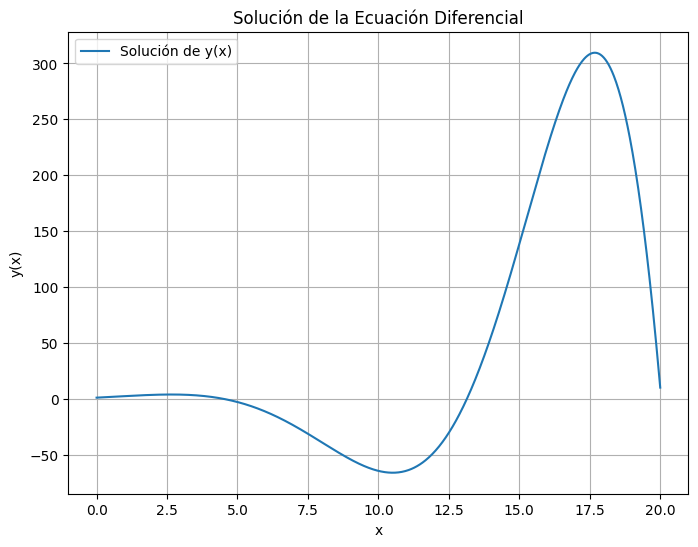

In [35]:
import numpy as np
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt

def ode(x, y):
    return np.vstack((y[1], (2*y[1] - y[0] - x) / 4))

def boundary_conditions(ya, yb):
    return np.array([ya[0] - 1, yb[0] - 10])

x = np.linspace(0, 20, 100) 
y_guess = np.zeros((2, x.size)) 

solution = solve_bvp(ode, boundary_conditions, x, y_guess)

x_plot = np.linspace(0, 20, 1000)
y_plot = solution.sol(x_plot)[0]  

plt.figure(figsize=(8, 6))
plt.plot(x_plot, y_plot, label='Solución de y(x)')
plt.title('Solución de la Ecuación Diferencial')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.legend()
plt.grid(True)
plt.show()
